In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("C:/Users/sahil/Desktop/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df['Geography'].nunique()

3

In [6]:
df = pd.concat([df,pd.get_dummies(df['Geography'],prefix='Geo')],axis=1)
df = pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)

In [7]:
df.drop(columns = ['RowNumber','CustomerId'])

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Female,Male
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [8]:
def num(column):
    for i in range(len(column)):
        if column[i]==True:
            column[i]=1
        else:
            column[i]=0

num(df['Geo_France'])
num(df['Geo_Germany'])
num(df['Geo_Spain'])
num(df['Female'])
num(df['Male'])

C:\Users\sahil\AppData\Local\Temp\ipykernel_12380\2028745826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i]=1
C:\Users\sahil\AppData\Local\Temp\ipykernel_12380\2028745826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i]=0


In [9]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Female,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geo_France',
       'Geo_Germany', 'Geo_Spain', 'Female', 'Male'],
      dtype='object')

In [11]:
x = df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary','Geo_France','Geo_Germany', 'Geo_Spain', 'Female', 'Male']]

In [13]:
y = df['Exited']

<AxesSubplot:xlabel='Exited', ylabel='count'>

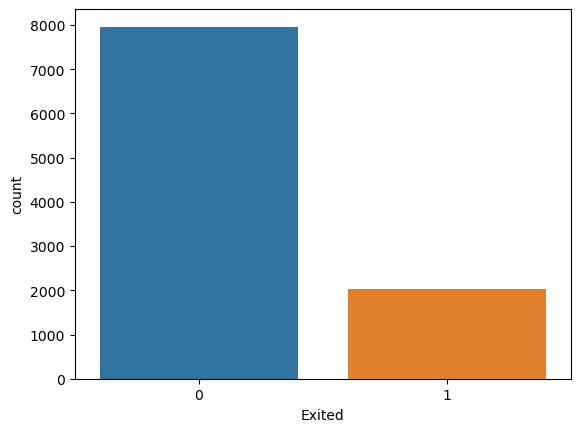

In [14]:
sns.countplot(x=y)

In [15]:
sc = StandardScaler()

In [18]:
sc_x = sc.fit_transform(x)
#sc_y = sc.fit_transform(y)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.2)

In [20]:
mlp = MLPClassifier()

In [21]:
mlp.fit(x_train, y_train)

c:\Users\sahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [22]:
predict = mlp.predict(x_test)

In [23]:
print(accuracy_score(y_test, predict))

0.859


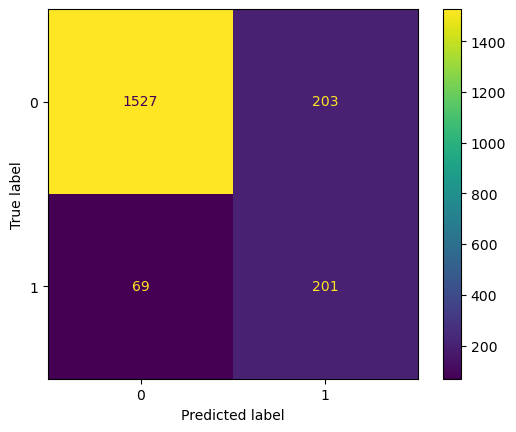

In [21]:
ConfusionMatrixDisplay.from_predictions(predict,y_test)

In [22]:
cm = confusion_matrix(predict,y_test)
cm

array([[1527,  203],
       [  69,  201]], dtype=int64)

In [23]:
TP = cm[0,[0]]
TN = cm[1,[1]]
FP = cm[0,[1]]
FN = cm[1,[0]]

In [24]:
TP

array([1527], dtype=int64)

In [25]:
acc = (TP+TN)/(TP+TN+FP+FN)
acc

array([0.864])

In [28]:
cr = classification_report(y_test, predict)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1596
           1       0.74      0.50      0.60       404

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

